In [17]:
# !pip install factor_analyzer

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo


In [2]:
data = pd.read_csv('../../Data/f_win.csv')

In [3]:
data.drop(['Unnamed: 0', 'Win'], axis =1, inplace = True)

In [4]:
data.head()

,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling
0,1,16,15,5,0.000000,3.000000,9.666667,2.333333,14.833333,0.0,0.0
1,0,5,15,5,0.333333,2.333333,12.333333,3.000000,14.133333,0.0,0.0
2,1,19,16,6,0.666667,1.666667,14.666667,3.000000,14.800000,0.0,0.0
3,0,4,17,5,1.666667,0.333333,18.333333,5.333333,18.433333,0.0,0.0
4,1,7,20,0,1.333333,0.333333,11.000000,4.000000,19.833333,0.0,0.0


In [5]:
scaler =  StandardScaler()
df = scaler.fit_transform(data)

df = pd.DataFrame(data=df,columns=data.columns)
df.head()

,venue_code,opp_code,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,pk_rolling,pkatt_rolling
0,1.001022,0.736916,-0.403068,0.277129,-1.639016,1.967929,-0.808241,-1.164732,-1.499824,-0.568704,-0.646228
1,-0.998979,-0.917075,-0.403068,0.277129,-1.251993,1.147749,-0.089070,-0.747508,-1.896874,-0.568704,-0.646228
2,1.001022,1.188004,0.023992,0.878703,-0.864970,0.327569,0.540205,-0.747508,-1.518731,-0.568704,-0.646228
3,-0.998979,-1.067438,0.451052,0.277129,0.296098,-1.312791,1.529065,0.712775,0.542146,-0.568704,-0.646228
4,1.001022,-0.616349,1.732231,-2.730739,-0.090925,-1.312791,-0.448656,-0.121673,1.336246,-0.568704,-0.646228


In [7]:
chi2,p = calculate_bartlett_sphericity(df)
print("Bartlett Sphericity Test")
print("Chi squared value : ",chi2)
print("p value : ",p)

Bartlett Sphericity Test
Chi squared value :  4306.557861839665
p value :  0.0


In [8]:
kmo_all,kmo_model = calculate_kmo(df)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.6081980507871866


Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [10]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df.shape[1])

In [11]:
fa.fit(df)

FactorAnalyzer(impute='drop', n_factors=11, rotation=None, rotation_kwargs={})

In [12]:
ev,_ = fa.get_eigenvalues()

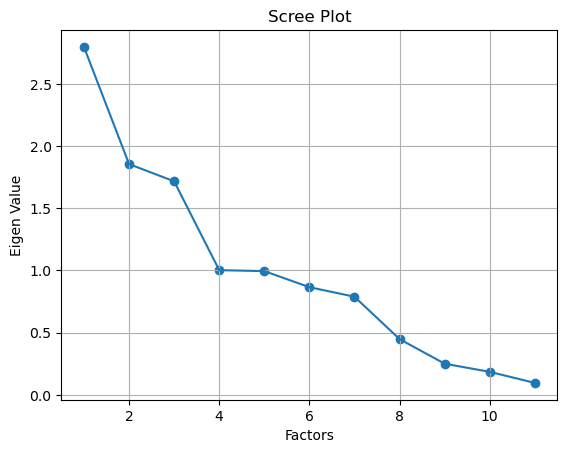

In [14]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [15]:
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [18]:
with np.printoptions(suppress=True,precision=3):
    print(pd.DataFrame(fa.get_eigenvalues()[0],columns=['EigenValues']))

    EigenValues
0      2.797885
1      1.855694
2      1.716912
3      1.002474
4      0.994734
5      0.865605
6      0.788773
7      0.447614
8      0.250105
9      0.184644
10     0.095560


In [20]:
with np.printoptions(suppress=True,precision=3):
    print(pd.DataFrame(fa.loadings_,index=df.columns))

                      0         1         2
venue_code    -0.070481  0.004554  0.001572
opp_code       0.031313 -0.050826 -0.047816
hour           0.018735  0.023522  0.958409
day_code       0.007962 -0.004998 -0.781870
gf_rolling     0.716135  0.201919 -0.038716
ga_rolling    -0.403721 -0.045205  0.036207
sh_rolling     0.771869  0.055340 -0.022350
sot_rolling    0.931882  0.029062 -0.024671
dist_rolling  -0.285014  0.122554 -0.012027
pk_rolling     0.083663  0.982787  0.009304
pkatt_rolling  0.108872  0.911220  0.014064


In [21]:
with np.printoptions(suppress=True,precision=3):
    print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2
Variance          2.246474  1.861115  1.536504
Proportional Var  0.204225  0.169192  0.139682
Cumulative Var    0.204225  0.373417  0.513099


In [22]:
with np.printoptions(suppress=True,precision=3):
    print(pd.DataFrame(fa.get_uniquenesses(),index=df.columns,columns=['Uniqueness']))

               Uniqueness
venue_code       0.995009
opp_code         0.994150
hour             0.080549
day_code         0.388590
gf_rolling       0.444881
ga_rolling       0.833655
sh_rolling       0.400656
sot_rolling      0.130142
dist_rolling     0.903603
pk_rolling       0.027044
pkatt_rolling    0.157628


In [23]:
with np.printoptions(precision=3,suppress=True):
    print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))

               Communalities
venue_code          0.004991
opp_code            0.005850
hour                0.919451
day_code            0.611410
gf_rolling          0.555119
ga_rolling          0.166345
sh_rolling          0.599344
sot_rolling         0.869858
dist_rolling        0.096397
pk_rolling          0.972956
pkatt_rolling       0.842372


In [ ]:
transformed_df.head()

In [24]:
factor_df= pd.DataFrame(fa.loadings_,index=df.columns)

In [25]:
factor_df

,0,1,2
venue_code,-0.070481,0.004554,0.001572
opp_code,0.031313,-0.050826,-0.047816
hour,0.018735,0.023522,0.958409
day_code,0.007962,-0.004998,-0.781870
gf_rolling,0.716135,0.201919,-0.038716
ga_rolling,-0.403721,-0.045205,0.036207
sh_rolling,0.771869,0.055340,-0.022350
sot_rolling,0.931882,0.029062,-0.024671
dist_rolling,-0.285014,0.122554,-0.012027
pk_rolling,0.083663,0.982787,0.009304
